In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
retention=pd.read_csv("HR_comma_sep.csv")
retention.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
print("Department:",retention.Department.unique())
print("Salary:",retention.salary.unique())

Department: ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
Salary: ['low' 'medium' 'high']


In [4]:
encoder=LabelEncoder()
retention['le_department']=encoder.fit_transform(retention['Department'])
retention['le_salary']=encoder.fit_transform(retention['salary'])
le_retention=retention.drop(['Department','salary'],axis=1)
le_retention.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,le_department,le_salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [5]:
le_retention.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
le_department            0
le_salary                0
dtype: int64

In [6]:
le_retention.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   le_department          14999 non-null  int32  
 9   le_salary              14999 non-null  int32  
dtypes: float64(2), int32(2), int64(6)
memory usage: 1.0 MB


<Axes: xlabel='le_department'>

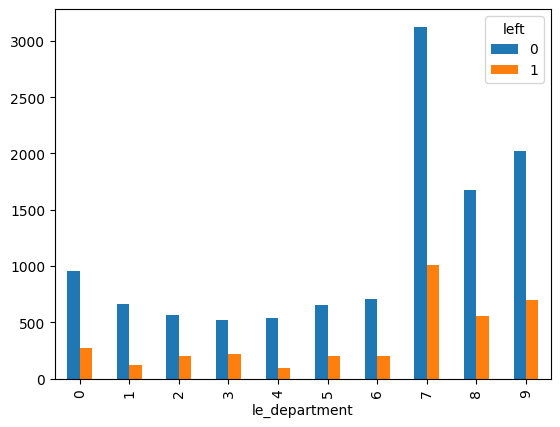

In [7]:
pd.crosstab(le_retention.le_department,le_retention.left).plot(kind='bar')

<Axes: xlabel='le_salary'>

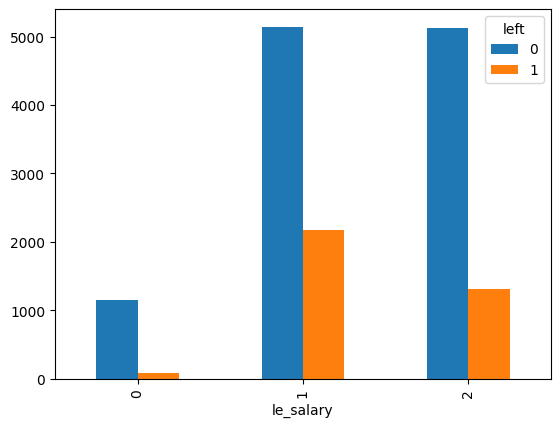

In [8]:
pd.crosstab(le_retention.le_salary,le_retention.left).plot(kind='bar')

<Axes: xlabel='le_salary'>

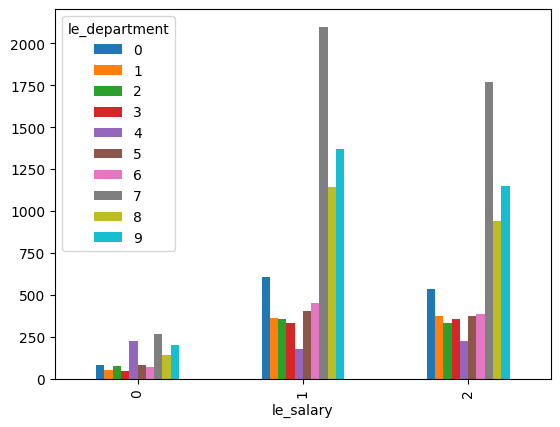

In [9]:
pd.crosstab(le_retention.le_salary,le_retention.le_department).plot(kind='bar')

<Axes: xlabel='promotion_last_5years'>

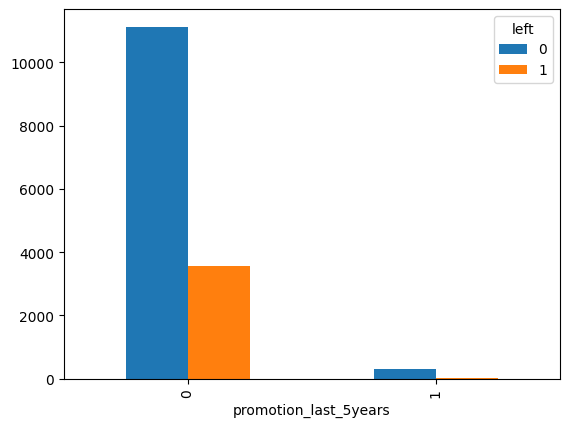

In [10]:
pd.crosstab(le_retention.promotion_last_5years,le_retention.left).plot(kind='bar')

In [11]:
x=le_retention.drop('left',axis=1)
y=le_retention.left

#Decision Tree

In [12]:
model_decision_tree=DecisionTreeClassifier()
model_decision_tree.fit(x,y)

DecisionTreeClassifier()

In [13]:
acc_decision_tree=model_decision_tree.score(x,y)
print("Accuracy:",acc_decision_tree)

Accuracy: 1.0


In [14]:
row=x.iloc[5].values
print("Actual Outcome:",y[5])
model_decision_tree.predict([row])

Actual Outcome: 1


f:\Code\ML_Exercise\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [15]:
y.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [16]:
y_predicted=model_decision_tree.predict(x)
cm=confusion_matrix(y,y_predicted)
cm

array([[11428,     0],
       [    0,  3571]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

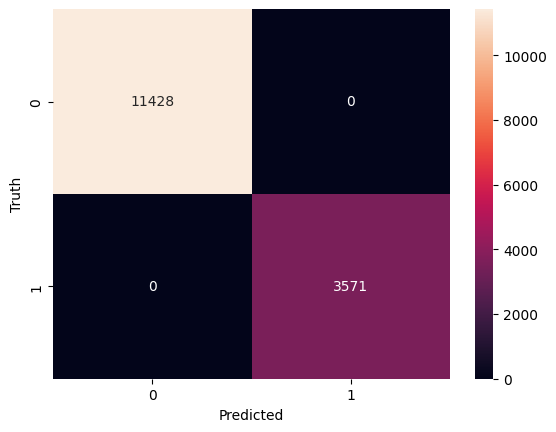

In [17]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

<Axes: xlabel='left'>

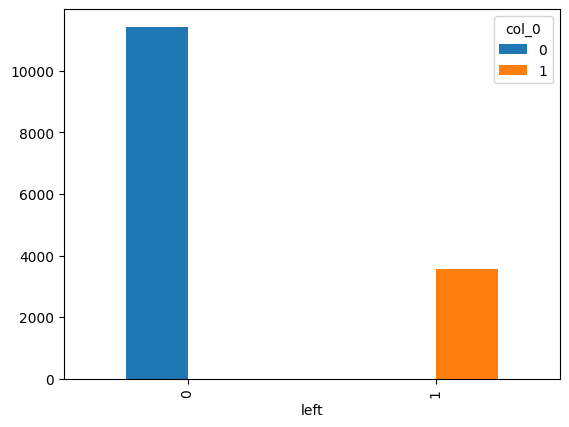

In [18]:
pd.crosstab(y,y_predicted).plot(kind='bar')

#Random Forest

In [19]:
model_random_forest=RandomForestClassifier()
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model_random_forest.fit(X_train,y_train)

RandomForestClassifier()

In [42]:
acc_random_forest=model_random_forest.score(X_test,y_test)
print("Accuracy:",acc_random_forest)

0.9993333333333333

In [21]:
row=x.iloc[45].values
print("Actual Value:",y[45])
model_random_forest.predict([row])

Actual Value: 1


f:\Code\ML_Exercise\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [22]:
pd.set_option('display.float_format', lambda x: '{:.0f}'.format(x))
y_predicted=model_random_forest.predict(x)
cm=confusion_matrix(y,y_predicted)
cm

array([[11426,     2],
       [   15,  3556]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

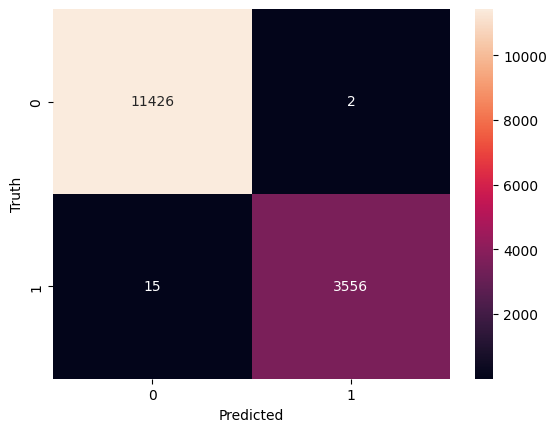

In [23]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

#Logistic Regression

In [24]:
model_logistic_regression=LogisticRegression(max_iter=15000)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
model_logistic_regression.fit(X_train,y_train)

LogisticRegression(max_iter=15000)

In [43]:
acc_logistic=model_logistic_regression.score(X_test,y_test)
print("Accuracy:",acc_logistic)

Accuracy: 0.768


In [26]:
row=x.iloc[4451].values
print("Actual Value:",y[4451])
model_logistic_regression.predict([row])

Actual Value: 0


f:\Code\ML_Exercise\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [27]:
y_predicted=model_logistic_regression.predict(x)
cm=confusion_matrix(y,y_predicted)
cm

array([[10549,   879],
       [ 2645,   926]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

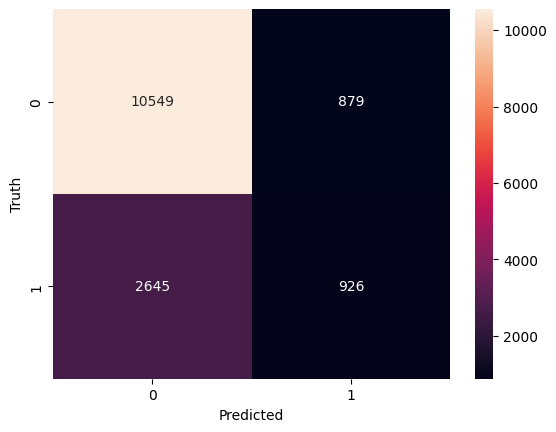

In [28]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

#Support Vector Machine(SVM)

In [29]:
model_svm=SVC()
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
model_svm.fit(X_train,y_train)

SVC()

In [44]:
acc_svm=model_svm.score(X_test,y_test)
print("Accuracy:",acc_svm)

Accuracy: 0.778


In [36]:
row=x.iloc[50].values
print("Actual Value:",y[50])
model_svm.predict([row])

Actual Value: 1


f:\Code\ML_Exercise\venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [37]:
y_predicted=model_logistic_regression.predict(x)
cm=confusion_matrix(y,y_predicted)
cm

array([[10549,   879],
       [ 2645,   926]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

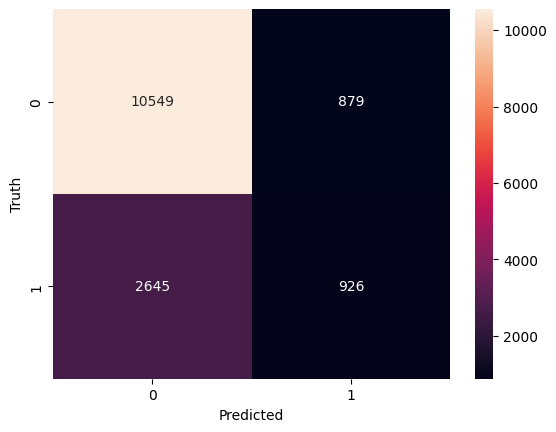

In [38]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

#Accuracy Analysis

<BarContainer object of 4 artists>

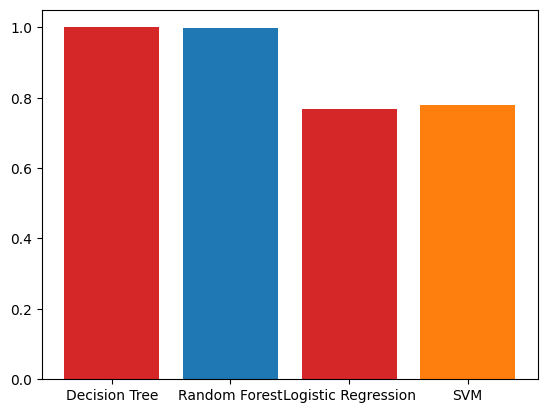

In [45]:

algorithm=[ "Decision Tree","Random Forest","Logistic Regression","SVM"]
accuracy=[acc_decision_tree,acc_random_forest,acc_logistic,acc_svm,]
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']
plt.bar(algorithm,accuracy,color=bar_colors)